In [ ]:
# import library @@Gaurav Lute@@
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import numpy as np 
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import read_csv
from datetime import datetime

In [11]:
data = pd.Series([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

# Generate lagged versions 
lag_1 = data.shift(1)
lag_2 = data.shift(2)
lag_3 = data.shift(3)

In [12]:
lag_1

0     NaN
1    10.0
2    15.0
3    20.0
4    25.0
5    30.0
6    35.0
7    40.0
8    45.0
9    50.0
dtype: float64

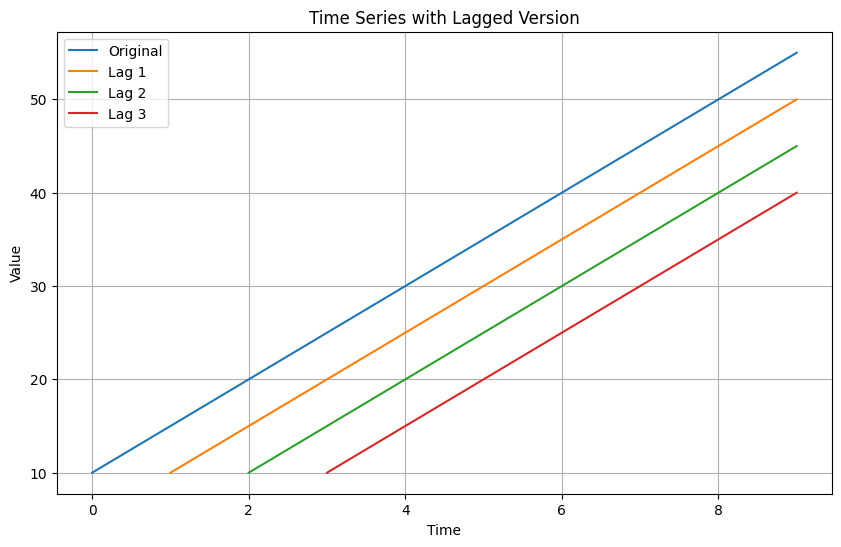

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(data, label = 'Original')
plt.plot(lag_1, label = 'Lag 1')
plt.plot(lag_2, label = 'Lag 2')
plt.plot(lag_3, label = 'Lag 3')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Lagged Version')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Example 
def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistics : %f' % result[0])
    print('P-value: %f' %result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\%s: %.3f' % (key, value))
    
    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")



<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Gaurav Lute\AppData\Local\Temp\ipykernel_12108\3993907170.py:10: SyntaxWarning: invalid escape sequence '\%'
  print('\%s: %.3f' % (key, value))


In [ ]:
dateparse = lambda x : datetime.strptime('190'+x, '%Y-%m')

In [33]:
series_2 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)


C:\Users\Gaurav Lute\AppData\Local\Temp\ipykernel_12108\413894136.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series_2 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)


In [38]:
series_2.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


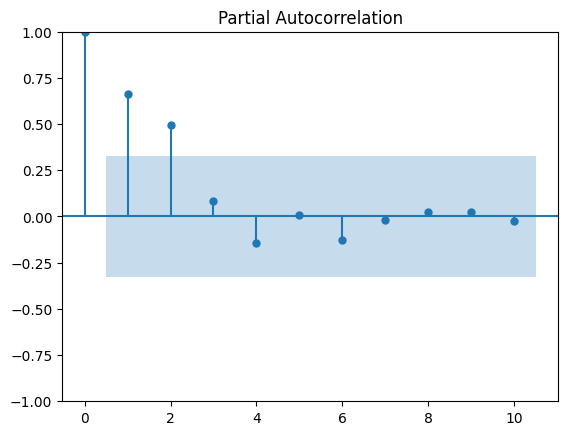

In [35]:
plot_pacf(series_2, lags=10)
plt.show()

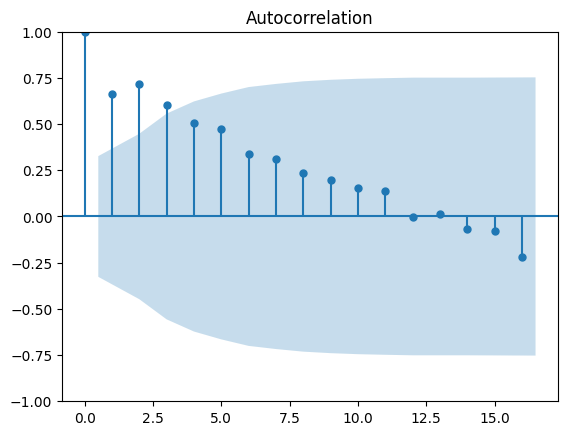

In [37]:
plot_acf(series_2)
plt.show()

In [53]:
# parameters 
np.random.seed(42)
n = 50 # no of datapoints 
mu = 0 # Mean of series
theta = 0.7 #MA parameters

# Generate MA(1) time Series data
errors = np.random.normal(loc = 0, scale=1, size=n)
data = [mu + errors[0]] # initial value

for i in range(1, n):
    data.append(mu + theta * errors[i-1] + errors[i])

# Create pandas DataFrame 
df = pd.DataFrame({'Time': pd.date_range(start='2024-01-01', periods=n, freq='D'),
                   'Data': data})

In [55]:
df.head(10)

,Time,Data
0,2024-01-01,0.496714
1,2024-01-02,0.209436
2,2024-01-03,0.550904
3,2024-01-04,1.976412
4,2024-01-05,0.831968
5,2024-01-06,-0.398044
6,2024-01-07,1.415317
7,2024-01-08,1.872884
8,2024-01-09,0.067730
9,2024-01-10,0.213928


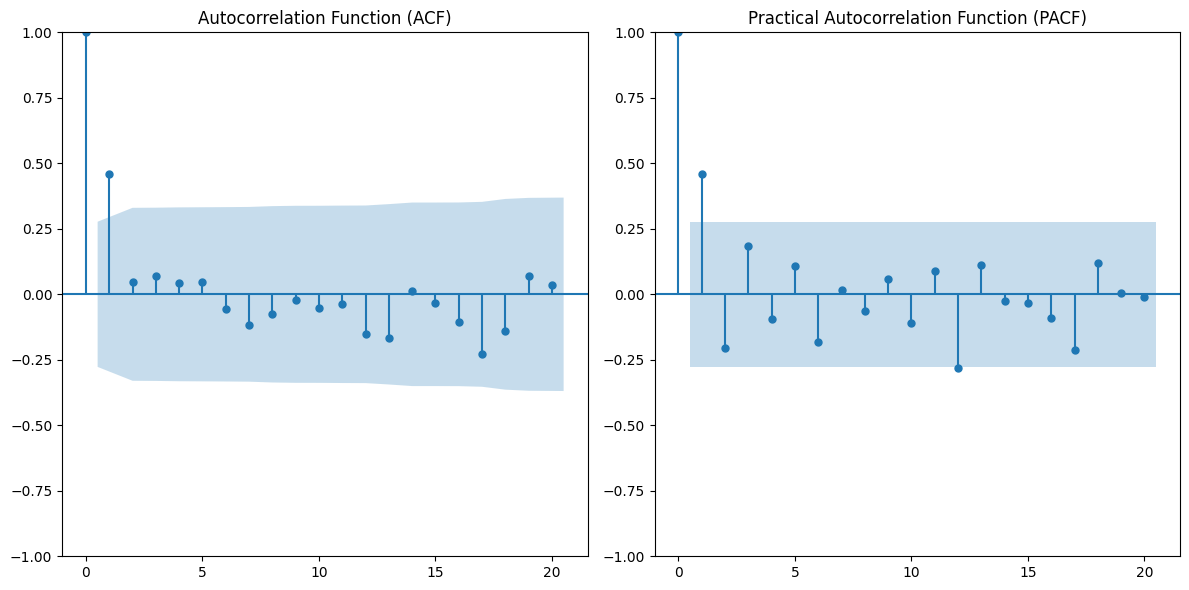

In [61]:
# Visualize the ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['Data'], lags=20, ax=plt.subplot(1,2,1))
plt.title('Autocorrelation Function (ACF)')
plot_pacf(df['Data'], lags=20, ax = plt.subplot(1,2,2))
plt.title('Practical Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [62]:
########END#############